# Heart disease Data Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../datasets/HeartDisease/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing data
df.dropna(inplace=True)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Map categorical values to labels
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df['target'] = df['target'].map({0: 'No Disease', 1: 'Disease'})
df['cp'] = df['cp'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'})


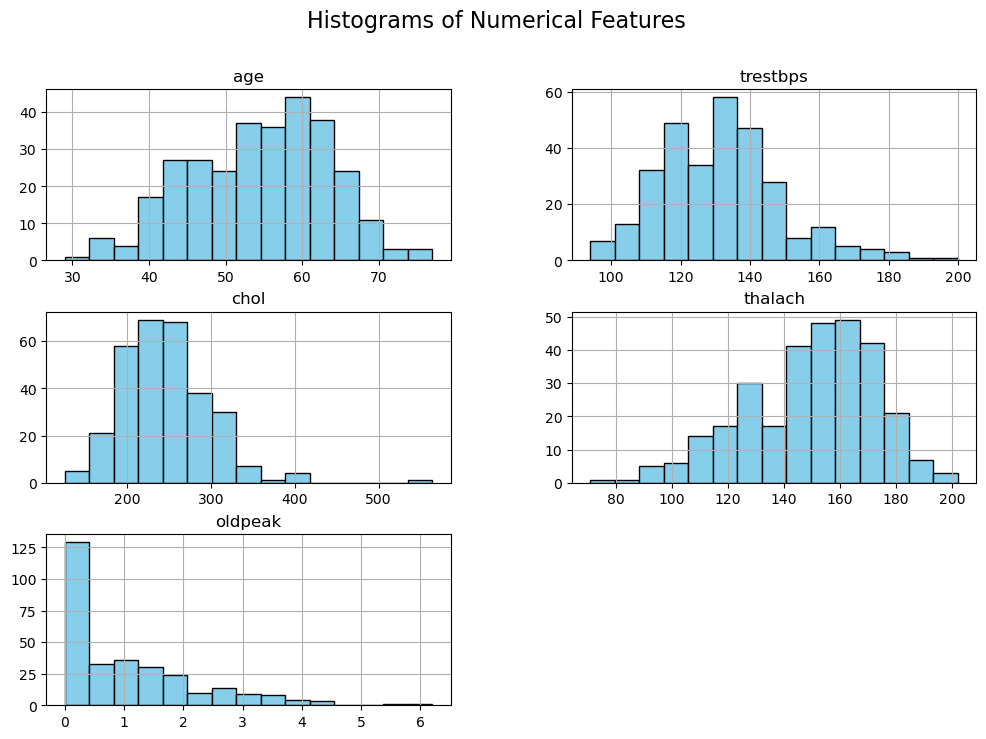

In [ ]:
# Histograms of numerical features (X -> range, Y-> Frequency)
# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46332\3300526552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y='age', data=df, jitter=0.3, palette='Set1')


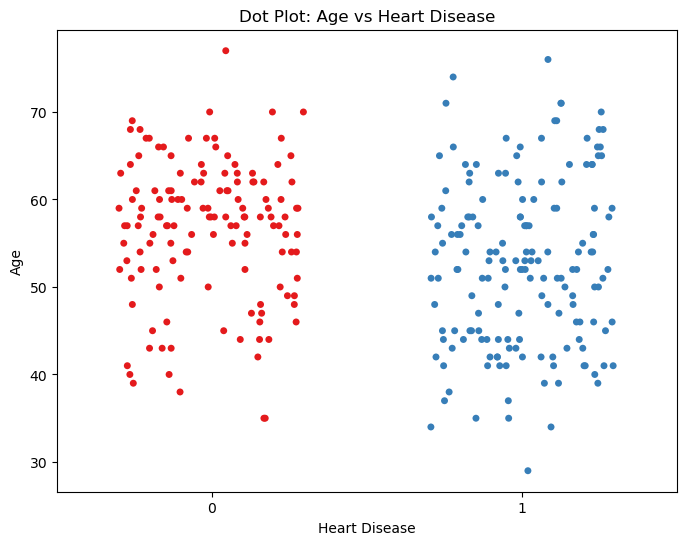

In [ ]:
# Dot Plot - Age vs Target
plt.figure(figsize=(8, 6))
sns.stripplot(x='target', y='age', data=df, jitter=0.3, palette='Set1')
plt.title('Dot Plot: Age vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46332\1073640668.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46332\1073640668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='coolwarm')


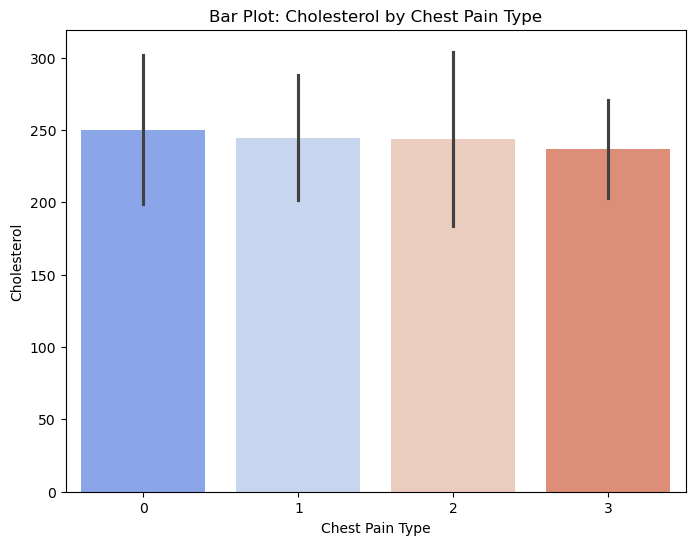

In [40]:
# Bar Plot - Cholesterol by Chest Pain Type
plt.figure(figsize=(8, 6))
sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='coolwarm')
plt.title('Bar Plot: Cholesterol by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.show()


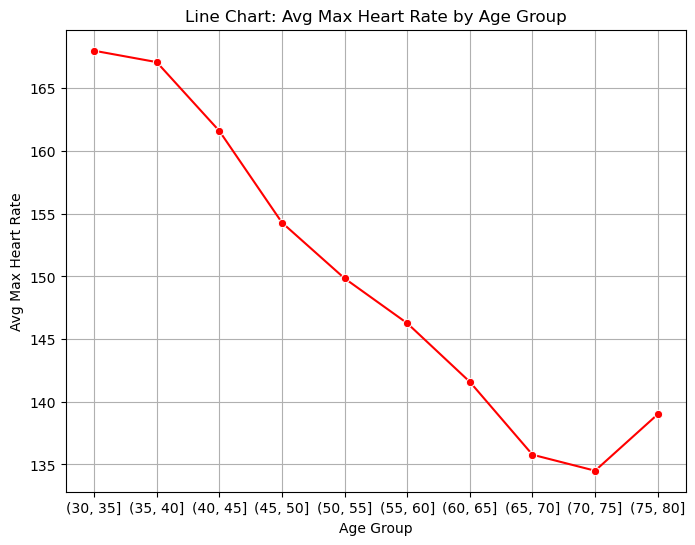

In [47]:
# Line Chart - Avg Thalach by Age Group
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=range(30, 81, 5))

# Group by age group with observed=True and convert to string for plotting
avg_thalach = df.groupby('age_group', observed=True)['thalach'].mean().reset_index()
avg_thalach['age_group'] = avg_thalach['age_group'].astype(str)

# Plot line chart
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_thalach, x='age_group', y='thalach', marker='o', color="red")
plt.title('Line Chart: Avg Max Heart Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Max Heart Rate')
plt.grid(True)
plt.show()

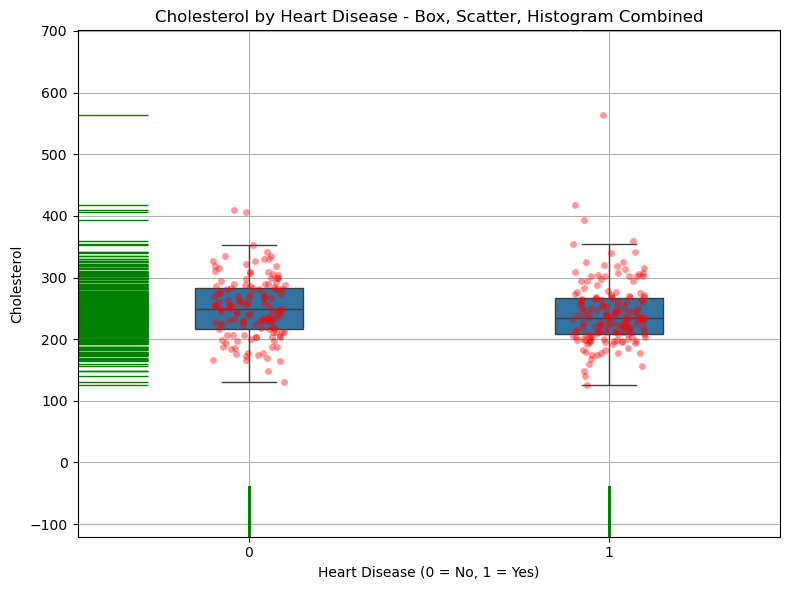

In [51]:
plt.figure(figsize=(8, 6))

# Box plot
sns.boxplot(data=df, x='target', y='chol', width=0.3, showfliers=False)

# Scatter plot (jitter for better visibility)
sns.stripplot(data=df, x='target', y='chol', color='red', alpha=0.4, jitter=True)

# Histogram-like rug plot (shows distribution on y-axis)
sns.rugplot(data=df, x='target', y='chol', height=0.1, color='green')

plt.title('Cholesterol by Heart Disease - Box, Scatter, Histogram Combined')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.tight_layout()
plt.show()